In [53]:

import numpy as np
import pandas as pd
from sklearn.datasets import load_iris,load_boston # iris 데이터 제공 라이브러리
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor


In [52]:

iris = load_iris() # 딕셔너리 형태로 제공 (정확하게는 Bunch)
 
# iris 데이터 프레임 형태로 저장
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df['target'] = iris_df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})

iris_df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [12]:
X = iris_df.iloc[:,:-1]
Y = iris_df.iloc[::-1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:


X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2)


In [38]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

ValueError: y should be a 1d array, got an array of shape (120, 5) instead.

In [28]:
svm_model.score(X_test,y_test)

NotFittedError: This SVC instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
svm_model.predict()

In [32]:
newDf =[iris_df.iloc[:,0].mean(),iris_df.iloc[:,1].mean(),iris_df.iloc[:,2].mean(),iris_df.iloc[:,3].mean()]

In [33]:
[newDf]

[[5.843333333333335, 3.057333333333334, 3.7580000000000027, 1.199333333333334]]

In [46]:
# boston(보스턴 위험지수 등의 내용 )데이터 가져오기 ()
boston_dt =  load_boston()['data']
boston_df = pd.DataFrame(boston_dt)
# 칼럼명 부여하기
boston_df.columns = load_boston()['feature_names']

boston_df['target'] = load_boston()['target']
boston_df.head(2)
boston_X = boston_df.iloc[:,:-1]
boston_Y = boston_df.iloc[::-1]

In [51]:
lm = LinearRegression()
lm.fit(boston_X,boston_Y)
lm.score(boston_X,boston_Y)

0.17083520591971987

In [54]:
rf = RandomForestRegressor()
rf.fit(boston_X,boston_Y)
rf.score(boston_X,boston_Y)

0.9392444239841805

In [56]:
# 각 feature의 중요도.
rf.feature_importances_

array([0.12175879, 0.03343799, 0.05720431, 0.00326683, 0.12190356,
       0.03759347, 0.03646101, 0.09372036, 0.0523892 , 0.09563247,
       0.27871203, 0.02752881, 0.04039118])

<BarContainer object of 13 artists>

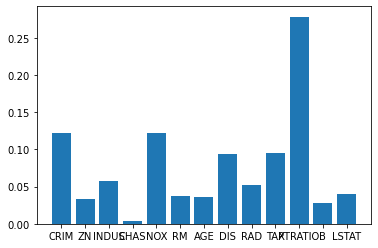

In [57]:
import matplotlib.pyplot as plt
plt.bar(load_boston()['feature_names'],rf.feature_importances_)